In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir -p ~/.kaggle
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

The syntax of the command is incorrect.
'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip /content/credit-card-fraud.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df = pd.read_csv('card_transdata.csv')

In [5]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [6]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

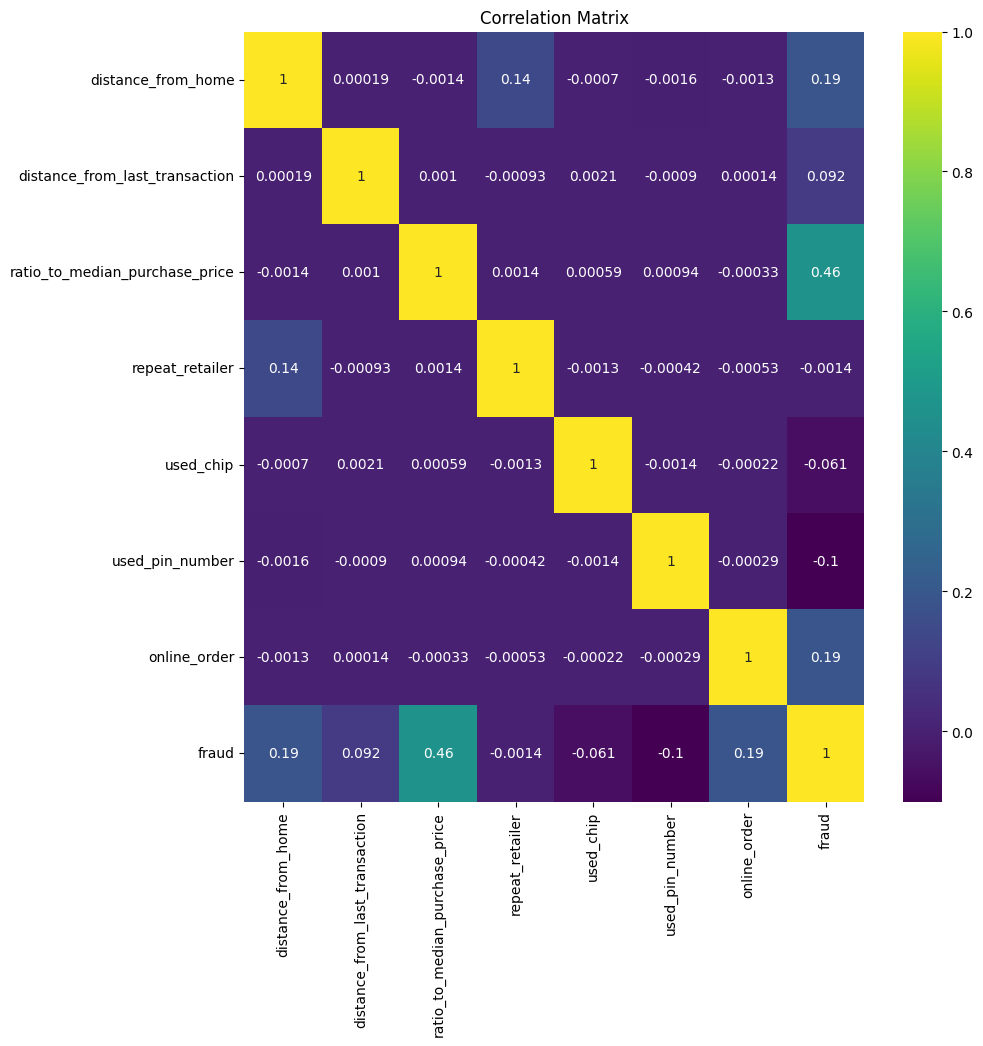

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

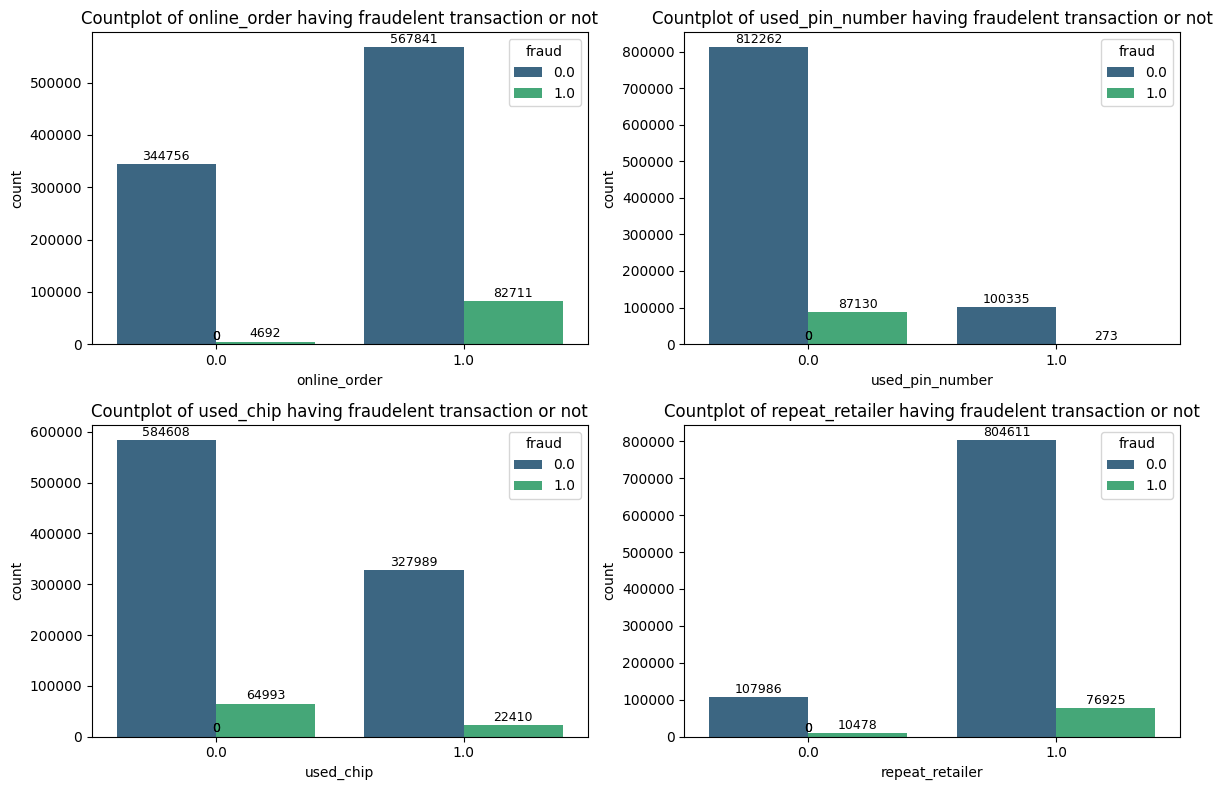

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.countplot(x='online_order', data=df, hue='fraud', palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Countplot of online_order having fraudelent transaction or not')
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

sns.countplot(x='used_pin_number', data=df, hue='fraud', palette='viridis', ax=axes[0,1])
axes[0,1].set_title('Countplot of used_pin_number having fraudelent transaction or not')
for p in axes[0,1].patches:
    axes[0,1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

sns.countplot(x='used_chip', data=df, hue='fraud', palette='viridis', ax=axes[1,0])
axes[1,0].set_title('Countplot of used_chip having fraudelent transaction or not')
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

sns.countplot(x='repeat_retailer', data=df, hue='fraud', palette='viridis', ax=axes[1,1])
axes[1,1].set_title('Countplot of repeat_retailer having fraudelent transaction or not')
for p in axes[1,1].patches:
    axes[1,1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_7588\4023461693.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['distance_from_home'], label = 'Plot 1', hist=False, ax = axes[0,0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_7588\4023461693.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

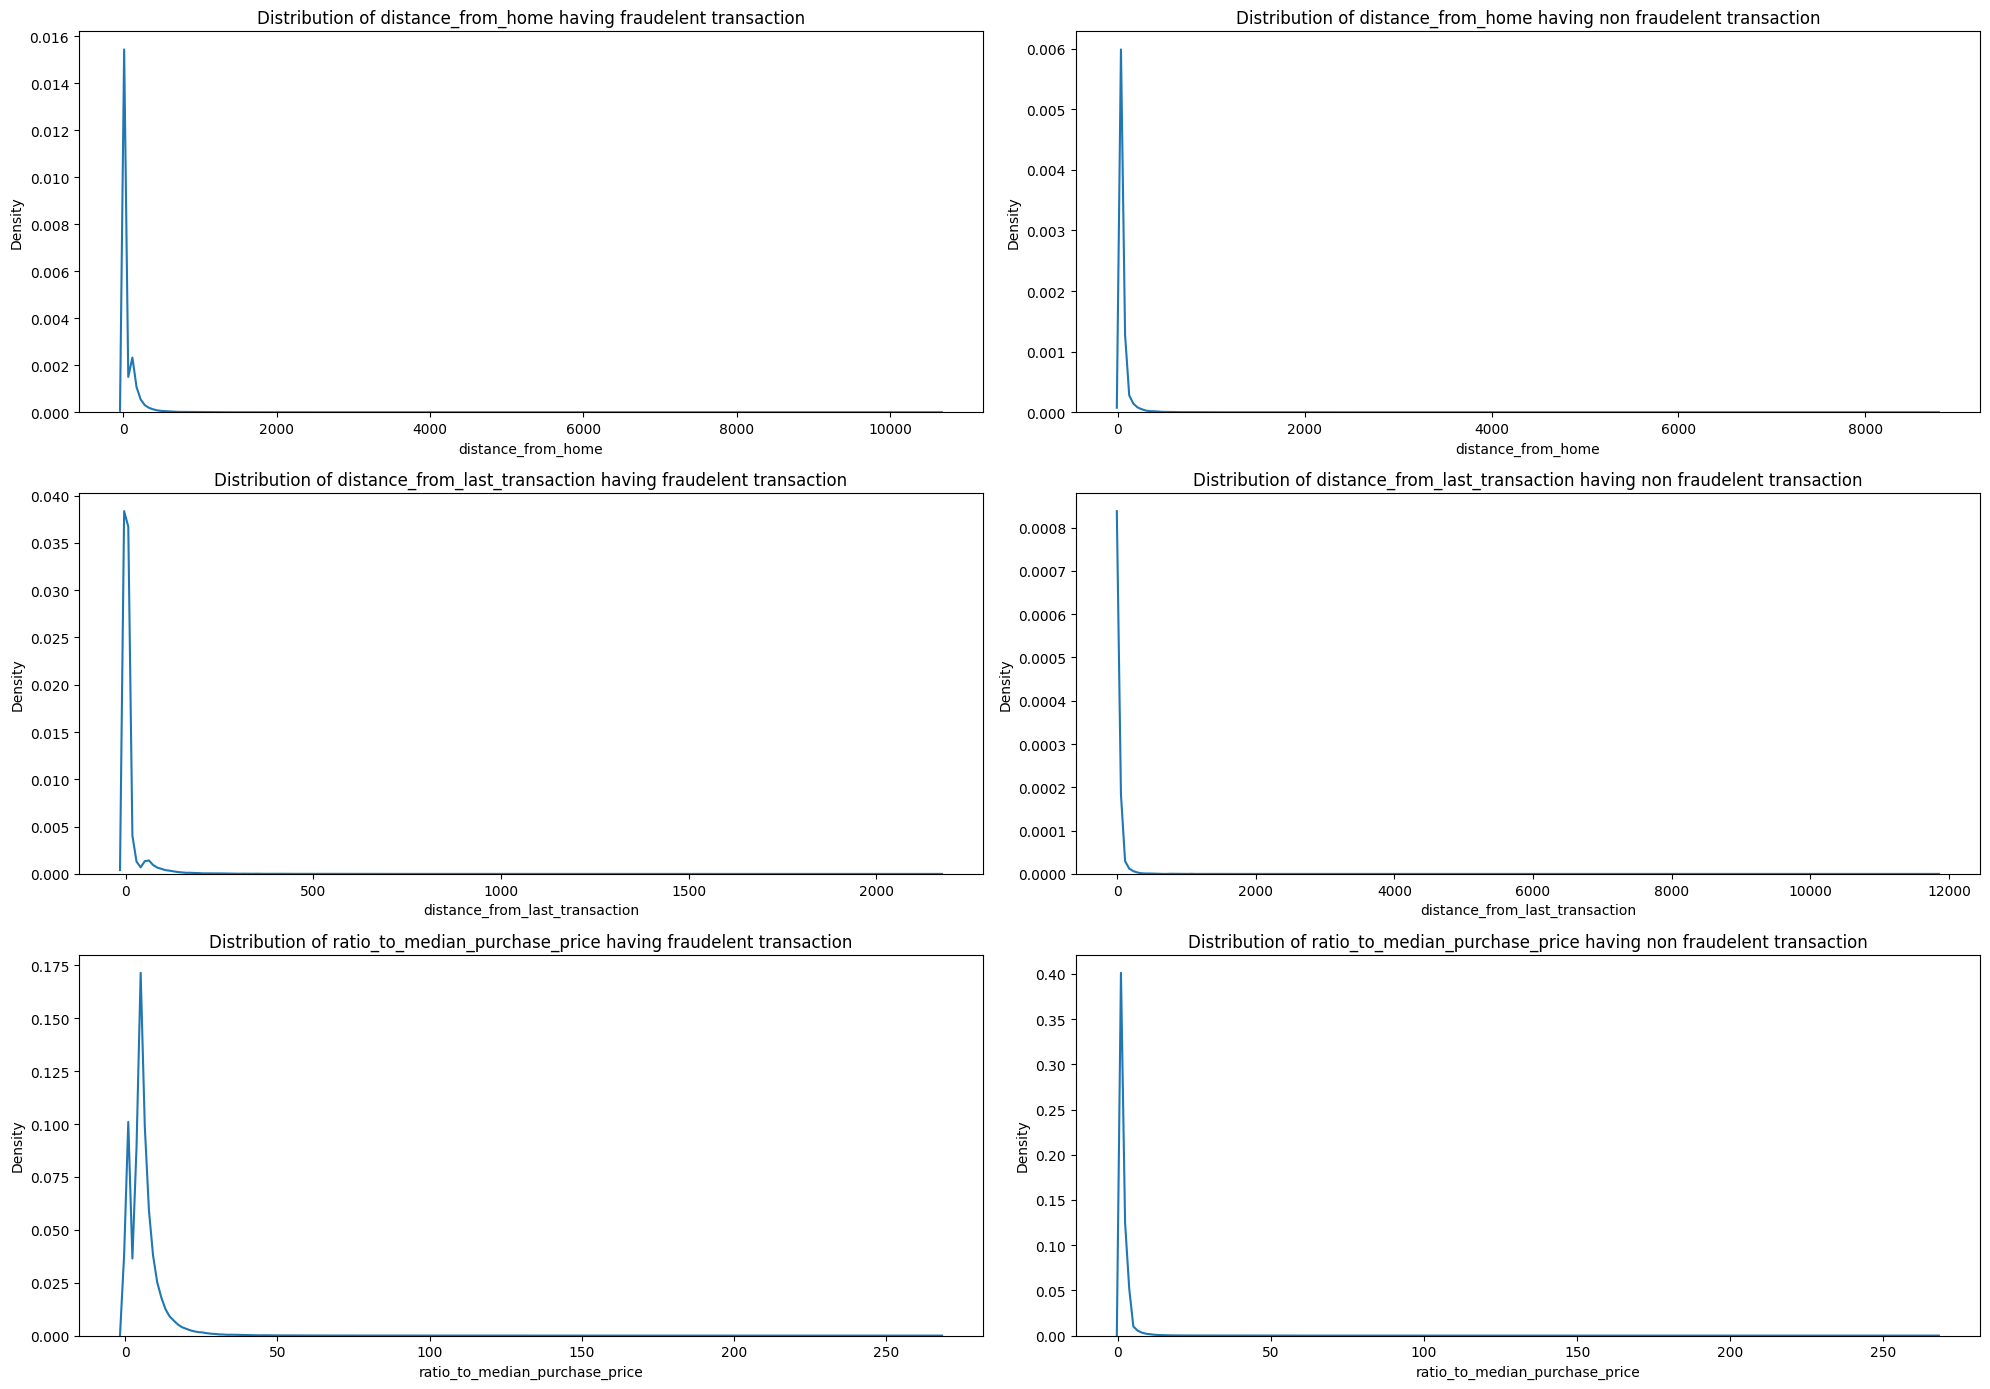

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,14))
sns.distplot(df[df['fraud'] == 1]['distance_from_home'], label = 'Plot 1', hist=False, ax = axes[0,0])
axes[0,0].set_title('Distribution of distance_from_home having fraudelent transaction')

sns.distplot(df[df['fraud'] == 0]['distance_from_home'], label = 'Plot 2', hist=False, ax = axes[0,1])
axes[0,1].set_title('Distribution of distance_from_home having non fraudelent transaction')

sns.distplot(df[df['fraud'] == 1]['distance_from_last_transaction'], label = 'Plot 3', hist=False, ax = axes[1,0])
axes[1,0].set_title('Distribution of distance_from_last_transaction having fraudelent transaction')

sns.distplot(df[df['fraud'] == 0]['distance_from_last_transaction'], label = 'Plot 4', hist=False, ax = axes[1,1])
axes[1,1].set_title('Distribution of distance_from_last_transaction having non fraudelent transaction')

sns.distplot(df[df['fraud'] == 1]['ratio_to_median_purchase_price'], label = 'Plot 5', hist=False, ax = axes[2,0])
axes[2,0].set_title('Distribution of ratio_to_median_purchase_price having fraudelent transaction')

sns.distplot(df[df['fraud'] == 0]['ratio_to_median_purchase_price'], label = 'Plot 6', hist=False, ax = axes[2,1])
axes[2,1].set_title('Distribution of ratio_to_median_purchase_price having non fraudelent transaction')

plt.tight_layout()
plt.show()

<Axes: ylabel='ratio_to_median_purchase_price'>

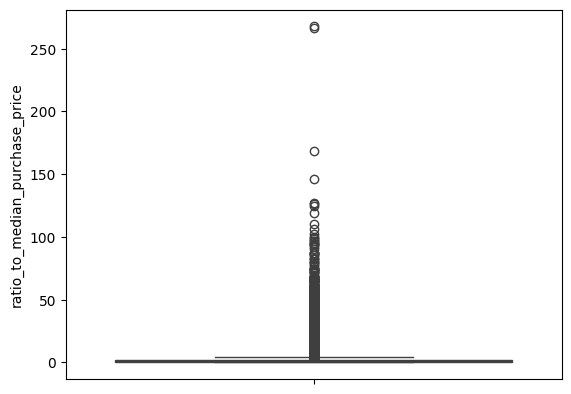

In [13]:
sns.boxplot(df['ratio_to_median_purchase_price'])

<Axes: ylabel='distance_from_home'>

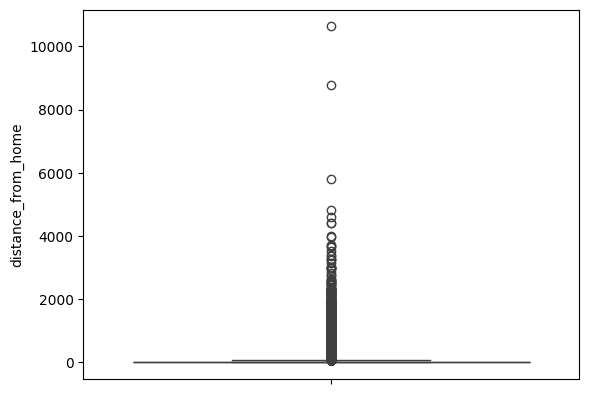

In [14]:
sns.boxplot(df['distance_from_home'])

<Axes: ylabel='distance_from_last_transaction'>

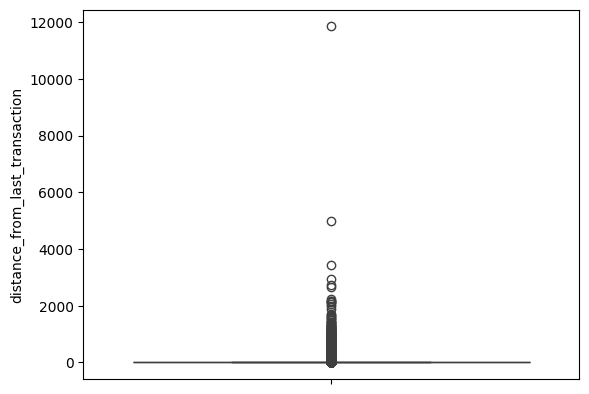

In [15]:
sns.boxplot(df['distance_from_last_transaction'])

In [16]:
df[df['distance_from_home'] >= 500]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
12,765.282559,0.371562,0.551245,1.0,1.0,0.0,0.0,0.0
261,601.522919,0.028723,0.859779,1.0,0.0,0.0,1.0,1.0
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0,1.0
568,537.151466,1.639335,1.899462,1.0,0.0,0.0,1.0,1.0
793,676.702348,1.209733,6.948586,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
997070,599.666634,0.075169,0.194894,1.0,1.0,0.0,0.0,0.0
998238,832.526950,0.065645,1.469088,1.0,1.0,0.0,1.0,0.0
998320,1160.674180,1.926613,3.314429,1.0,0.0,0.0,1.0,1.0
998909,521.424992,0.306265,26.258340,1.0,0.0,0.0,1.0,1.0


In [17]:
df[df['distance_from_last_transaction'] >= 50]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
155,3.357481,990.070315,3.157890,1.0,0.0,0.0,0.0,0.0
187,20.141476,116.562477,1.172999,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999703,8.861100,85.627567,5.528836,1.0,1.0,0.0,1.0,1.0
999762,13.366239,51.944082,0.507591,1.0,1.0,0.0,1.0,0.0
999832,30.068841,53.257849,3.728376,1.0,0.0,1.0,0.0,0.0
999869,58.359075,210.755452,1.778183,1.0,0.0,0.0,1.0,1.0


In [18]:
df['distance_from_home'].quantile(0.98)

177.42540452162518

In [19]:
df['distance_from_last_transaction'].quantile(0.98)

40.086181050792014

In [20]:
df['ratio_to_median_purchase_price'].quantile(0.99)

12.794085597651492

In [21]:
df['distance_from_home'] = np.where(df['distance_from_home'] >= 177, 177, df['distance_from_home'])
df['distance_from_last_transaction'] = np.where(df['distance_from_last_transaction'] >= 40, 40, df['distance_from_last_transaction'])
df['ratio_to_median_purchase_price'] = np.where(df['ratio_to_median_purchase_price'] >= 13, 13, df['ratio_to_median_purchase_price'])

In [22]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [23]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,23.332962,3.818179,1.754288,0.881536,0.350399,0.100608,0.650552,0.087403
std,35.046347,7.530770,2.177631,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,177.000000,40.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_7588\2499530988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['distance_from_home'], label = 'Plot 1', hist=False, ax = axes[0,0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_7588\2499530988.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

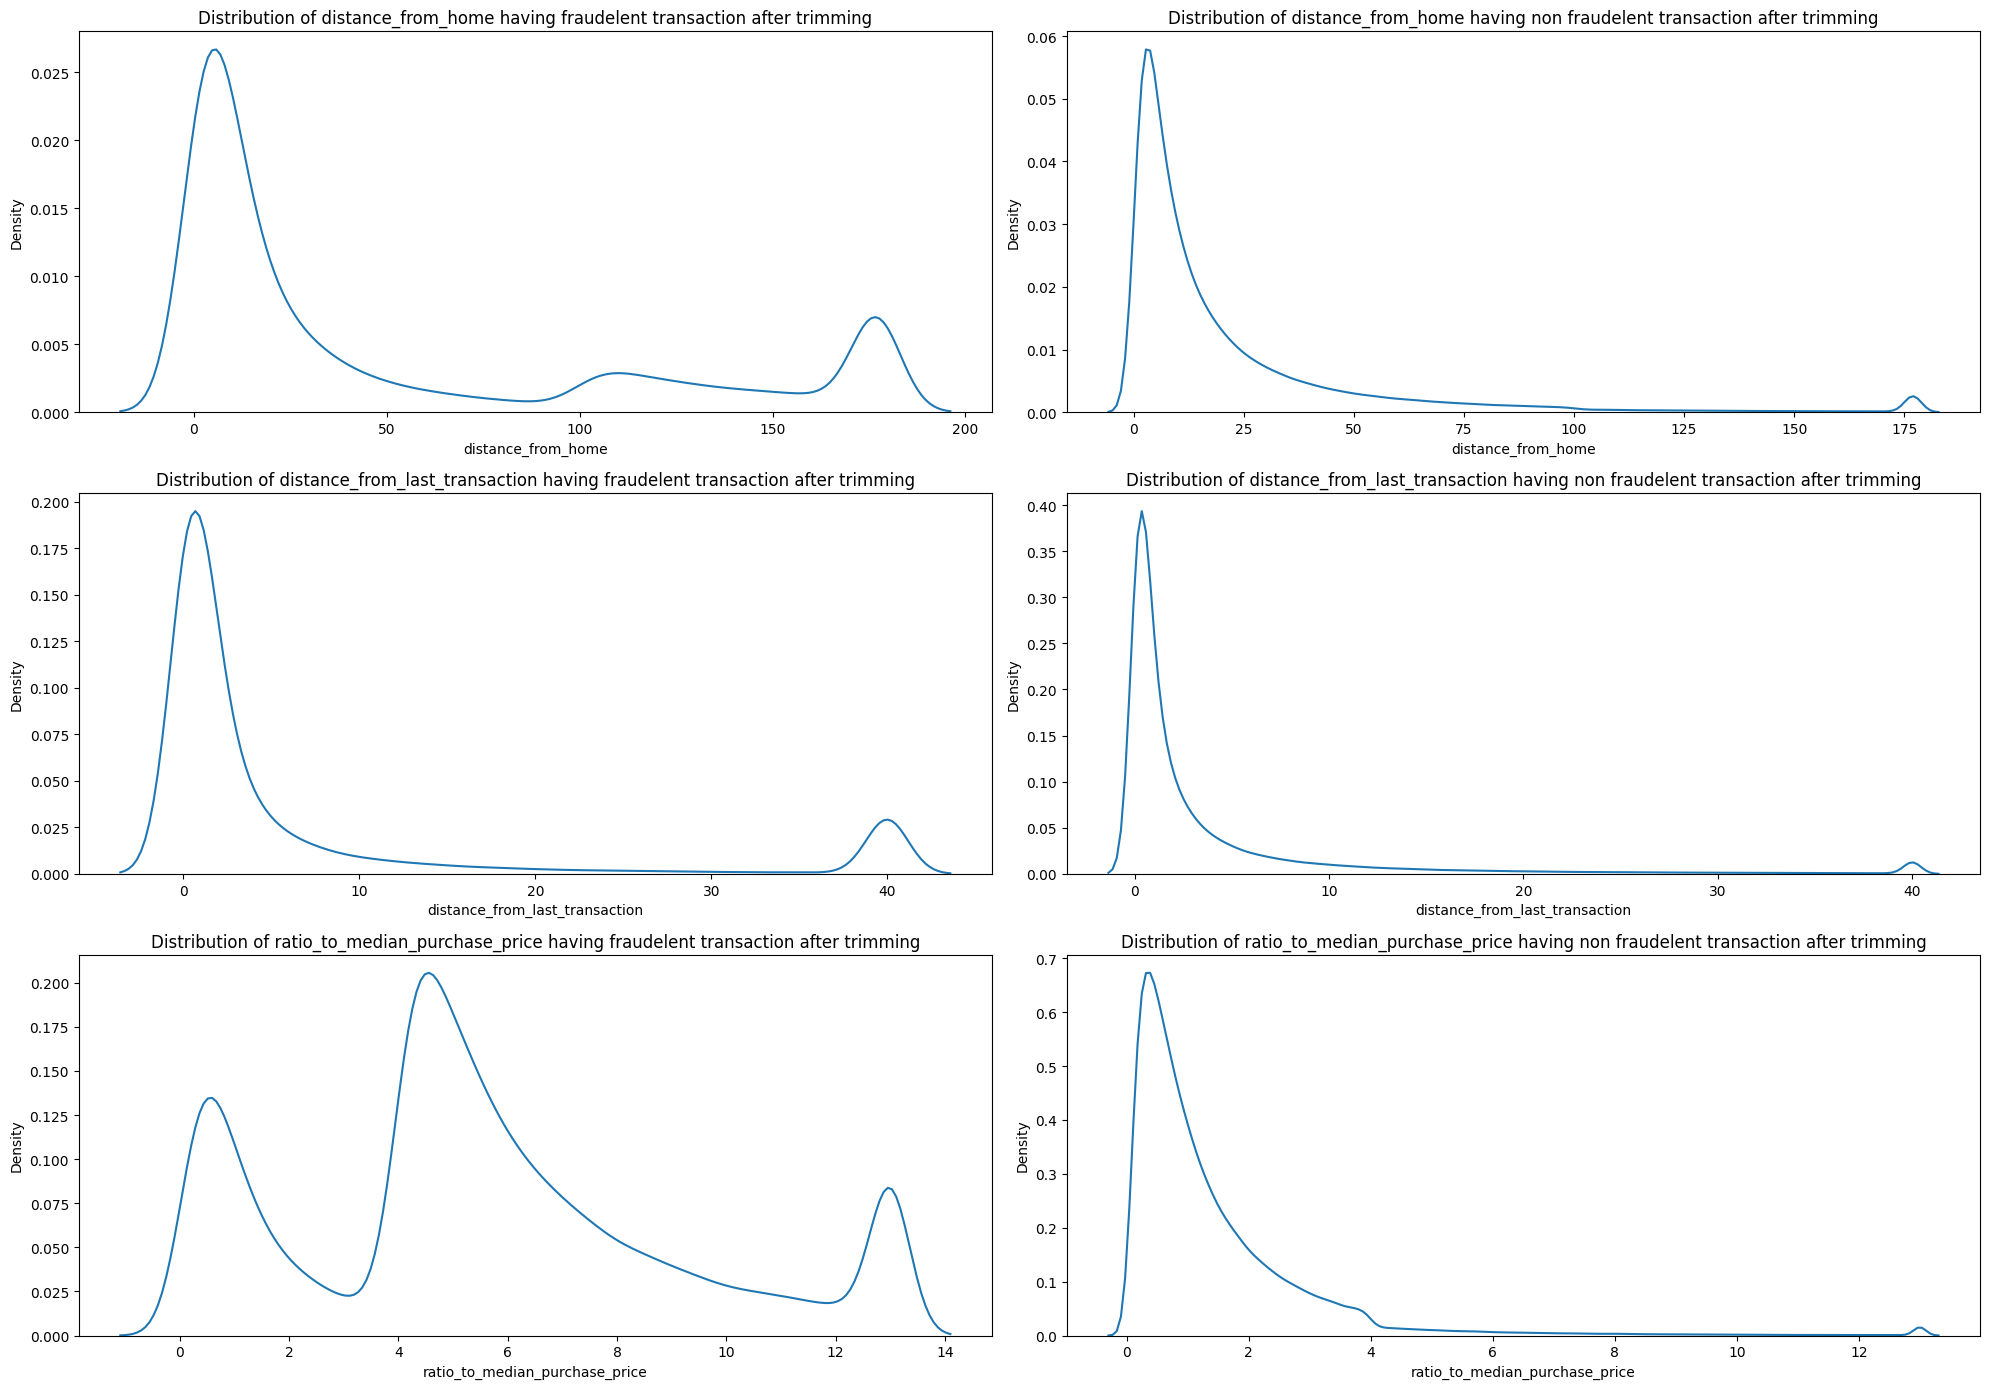

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,14))
sns.distplot(df[df['fraud'] == 1]['distance_from_home'], label = 'Plot 1', hist=False, ax = axes[0,0])
axes[0,0].set_title('Distribution of distance_from_home having fraudelent transaction after trimming')

sns.distplot(df[df['fraud'] == 0]['distance_from_home'], label = 'Plot 2', hist=False, ax = axes[0,1])
axes[0,1].set_title('Distribution of distance_from_home having non fraudelent transaction after trimming')

sns.distplot(df[df['fraud'] == 1]['distance_from_last_transaction'], label = 'Plot 3', hist=False, ax = axes[1,0])
axes[1,0].set_title('Distribution of distance_from_last_transaction having fraudelent transaction after trimming')

sns.distplot(df[df['fraud'] == 0]['distance_from_last_transaction'], label = 'Plot 4', hist=False, ax = axes[1,1])
axes[1,1].set_title('Distribution of distance_from_last_transaction having non fraudelent transaction after trimming')

sns.distplot(df[df['fraud'] == 1]['ratio_to_median_purchase_price'], label = 'Plot 5', hist=False, ax = axes[2,0])
axes[2,0].set_title('Distribution of ratio_to_median_purchase_price having fraudelent transaction after trimming')

sns.distplot(df[df['fraud'] == 0]['ratio_to_median_purchase_price'], label = 'Plot 6', hist=False, ax = axes[2,1])
axes[2,1].set_title('Distribution of ratio_to_median_purchase_price having non fraudelent transaction after trimming')

plt.tight_layout()
plt.show()

In [25]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
rfc = RandomForestClassifier(verbose=4, n_jobs=-1)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s


building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   14.4s


building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.3s finished


RandomForestClassifier(n_jobs=-1, verbose=4)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy Score : 0.997095
              precision    recall  f1-score   support

         0.0    0.99910   0.99772   0.99841    182557
         1.0    0.97644   0.99060   0.98347     17443

    accuracy                        0.99709    200000
   macro avg    0.98777   0.99416   0.99094    200000
weighted avg    0.99712   0.99709   0.99710    200000



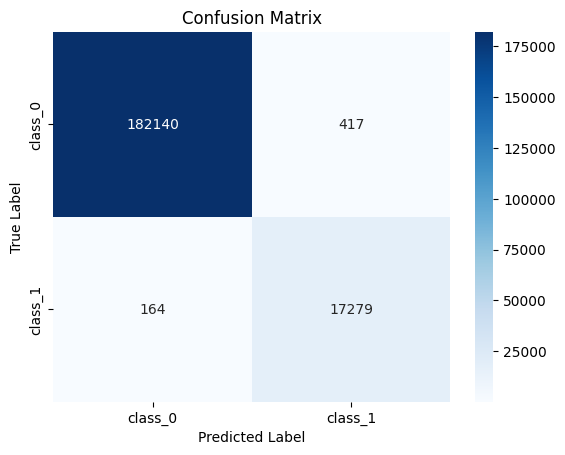

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_rfc = rfc.predict(X_test)
print('Accuracy Score :', accuracy_score(y_test, y_pred_rfc))
cm = confusion_matrix(y_test, y_pred_rfc)

target_names = ['class_0', 'class_1']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_rfc, digits=5))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])
X_test_scaled = scaler.transform(X_test[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])

In [28]:
X_train_final = np.concatenate((X_train_scaled, X_train.drop(['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'], axis=1)), axis=1)
X_test_final = np.concatenate((X_test_scaled, X_test.drop(['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'], axis=1)), axis=1)

In [29]:
X_train_final

array([[ 0.36834662, -0.47428866, -0.72222901, ...,  1.        ,
         0.        ,  1.        ],
       [-0.07554228, -0.4310906 , -0.50090974, ...,  1.        ,
         0.        ,  1.        ],
       [-0.52929178, -0.18990652,  0.81843452, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.08126291, -0.50662384, -0.38543317, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38154183, -0.48488971, -0.26657555, ...,  0.        ,
         0.        ,  1.        ],
       [-0.64583834, -0.17411023, -0.18008821, ...,  1.        ,
         0.        ,  0.        ]])

In [44]:
from sklearn.svm import SVC

svc = SVC(verbose=True, max_iter=20000)
svc.fit(X_train_final, y_train)

y_pred_svc = svc.predict(X_test_final)
print(classification_report(y_test, y_pred_svc, digits=5))

[LibSVM]              precision    recall  f1-score   support

         0.0    0.99911   0.99686   0.99798    182557
         1.0    0.96790   0.99066   0.97915     17443

    accuracy                        0.99632    200000
   macro avg    0.98350   0.99376   0.98856    200000
weighted avg    0.99638   0.99632   0.99634    200000



In [45]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train_final, y_train)

LogisticRegression(n_jobs=-1)

Accuracy Score : 0.962
              precision    recall  f1-score   support

         0.0    0.97178   0.98703   0.97935    182557
         1.0    0.83757   0.70005   0.76266     17443

    accuracy                        0.96200    200000
   macro avg    0.90468   0.84354   0.87100    200000
weighted avg    0.96008   0.96200   0.96045    200000



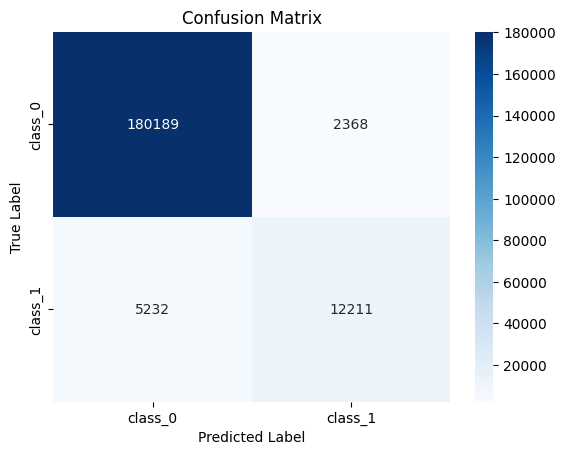

In [46]:
y_pred_lr = lr.predict(X_test_final)
print('Accuracy Score :', accuracy_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)

target_names = ['class_0', 'class_1']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_lr, digits=5))

In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

print("Resampled dataset shape:", y_train_resampled.value_counts())

Resampled dataset shape: fraud
0.0    730040
1.0    730040
Name: count, dtype: int64


Random Forest Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.2s finished


              precision    recall  f1-score   support

         0.0    0.99992   0.99743   0.99868    182557
         1.0    0.97380   0.99920   0.98633     17443

    accuracy                        0.99759    200000
   macro avg    0.98686   0.99831   0.99250    200000
weighted avg    0.99764   0.99759   0.99760    200000



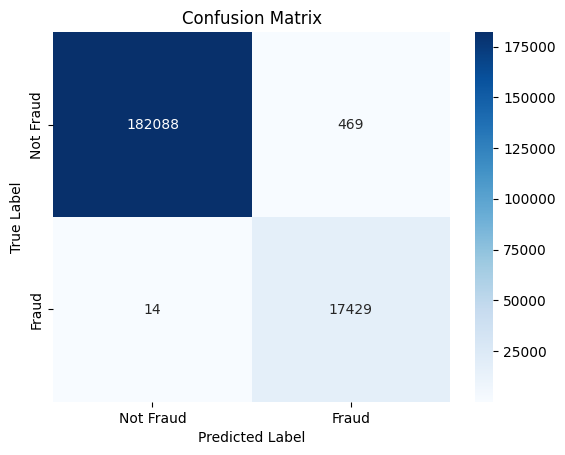

In [94]:
model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, verbose=1)
model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = model.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_rf)

target_names = ['Not Fraud', 'Fraud']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_rf, digits=5))

XGBoost Classifier

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0    0.99952   0.99529   0.99740    182557
         1.0    0.95279   0.99501   0.97344     17443

    accuracy                        0.99526    200000
   macro avg    0.97616   0.99515   0.98542    200000
weighted avg    0.99545   0.99526   0.99531    200000



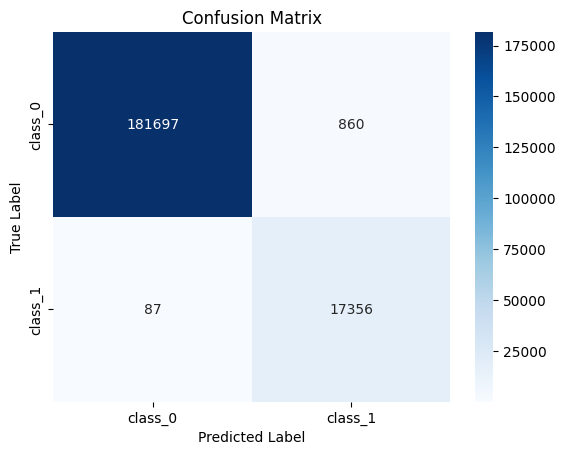

In [95]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='binary:logitraw',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
	max_depth = 5
)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_xgb)

target_names = ['class_0', 'class_1']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_xgb, digits=5))

Stacked Model (Random Forest + XGBoost + SVC)

In [97]:
from sklearn.ensemble import StackingClassifier

rf_model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, verbose=1)

xgb_model = XGBClassifier(
    objective='binary:logitraw',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
	max_depth = 5,
	verbose = 1
)

svc_model = SVC(verbose=True, max_iter=20000)

base_learners = [
    ('RandomForest', model),
    ('xgb', xgb_model),
	('svc', svc_model)
]

meta_classifier = LogisticRegression(verbose=1)

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier, verbose = 2)
stacking_clf.fit(X_train_resampled, y_train_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   49.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   47.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: D

[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


StackingClassifier(estimators=[('RandomForest',
                                RandomForestClassifier(n_estimators=150,
                                                       n_jobs=-1,
                                                       random_state=42,
                                                       verbose=1)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logitraw', ...)),
                               ('svc', SVC(max_iter=20000, verbose=True))],
                   final_estimator=LogisticRegression(verbose=1), verbose=2)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.2s finished


              precision    recall  f1-score   support

         0.0    0.99991   0.99744   0.99867    182557
         1.0    0.97390   0.99903   0.98630     17443

    accuracy                        0.99758    200000
   macro avg    0.98690   0.99823   0.99249    200000
weighted avg    0.99764   0.99758   0.99759    200000



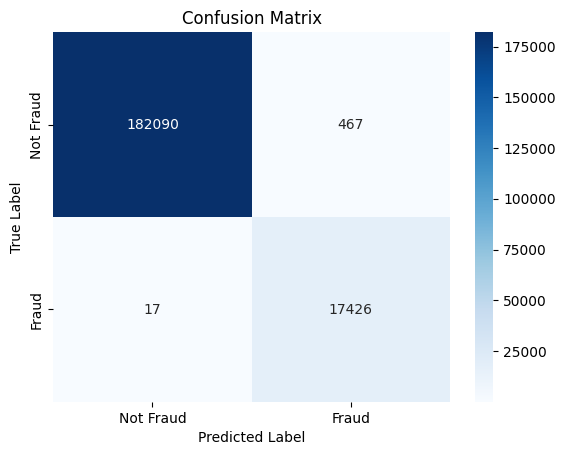

In [99]:
y_pred_stacked = stacking_clf.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_stacked)

target_names = ['Not Fraud', 'Fraud']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_stacked, digits=5))